# Deep Learning Project
## Training an LSTM Network to Predict Li-Ion Battery Performance Over Time
### Clean Data Jupyter Notebook
Name: Andrea Hwang\
Presentation Date: June 3, 2025\
Class: AISV.X401 at UCSC Silicon Valley Extension
#### Dataset
NASA Battery Dataset from Kaggle (https://www.kaggle.com/datasets/patrickfleith/nasa-battery-dataset/data)

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("patrickfleith/nasa-battery-dataset")

print("Path to dataset files:", path)

/opt/miniconda3/envs/deep-learning-project/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2


### Read in meta-data

In [3]:
for files in os.listdir(path):
    data_path = os.path.join(path, files)

file_path = data_path + '/data/'
meta_data = pd.read_csv(data_path + "/metadata.csv")
meta_data

,type,start_time,ambient_temperature,battery_id,test_id,uid,filename,Capacity,Re,Rct
0,discharge,[2010. 7. 21. 15. 0. ...,4,B0047,0,1,00001.csv,1.6743047446975208,NaN,NaN
1,impedance,[2010. 7. 21. 16. 53. ...,24,B0047,1,2,00002.csv,NaN,0.05605783343888099,0.20097016584458333
2,charge,[2010. 7. 21. 17. 25. ...,4,B0047,2,3,00003.csv,NaN,NaN,NaN
3,impedance,[2010 7 21 20 31 5],24,B0047,3,4,00004.csv,NaN,0.05319185850921101,0.16473399914864734
4,discharge,[2.0100e+03 7.0000e+00 2.1000e+01 2.1000e+01 2...,4,B0047,4,5,00005.csv,1.5243662105099023,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
7560,impedance,[2010. 9. 30. 7. 36. ...,24,B0055,247,7561,07561.csv,NaN,0.0968087979207628,0.15489738203707232
7561,discharge,[2010. 9. 30. 8. 8. ...,4,B0055,248,7562,07562.csv,1.0201379996149256,NaN,NaN
7562,charge,[2010. 9. 30. 8. 48. 54.25],4,B0055,249,7563,07563.csv,NaN,NaN,NaN
7563,discharge,[2010. 9. 30. 11. 50. ...,4,B0055,250,7564,07564.csv,0.9907591663373165,NaN,NaN


### Process Data Frames

In [4]:
def set_time(time_col, prev_time):
    for i in range(len(time_col)):
        time_col[i] += prev_time

In [7]:
def get_time_series_cycle(battery_id):
    battery = meta_data.loc[(meta_data['battery_id']==battery_id)]
    battery_time_series = battery.loc[(battery['type']!='impedance')]
    battery_time_series = battery_time_series.reset_index(drop=True)
    features = ['Voltage_measured', 'Current_measured', 'Temperature_measured', 'Current_applied', 'Voltage_applied', 'Time']
    df = pd.DataFrame(columns=features)
    files = battery_time_series['filename'][:-1]
    charge = {'Voltage_measured': 'Voltage_measured', 'Current_measured': 'Current_measured', 'Temperature_measured': 'Temperature_measured', 
                        'Current_charge': 'Current_applied', 'Voltage_charge': 'Voltage_applied', 'Time': 'Time'}
    discharge = {'Voltage_measured': 'Voltage_measured', 'Current_measured': 'Current_measured', 'Temperature_measured': 'Temperature_measured', 
                        'Current_load': 'Current_applied', 'Voltage_load': 'Voltage_applied', 'Time': 'Time'}
    col_dict = {'charge': charge, 'discharge': discharge}
    for i, file in enumerate(files):
        print(f'{file_path}/{file}')
        data = pd.read_csv(f'{file_path}/{file}')
        experiment = battery_time_series['type'][i]
        data = data.rename(columns=col_dict[experiment])
        if i > 0:
            prev = df['Time'].iloc[-1]
            print(prev)
            set_time(data['Time'], prev)
        df = df.append(data)
        df = df.reset_index(drop=True)
    return df   

#### Clean and Save Data for Battery B0005

In [19]:
battery5 = get_time_series_cycle('B0005')
battery5

/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//05121.csv
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//05122.csv
7597.875
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//05123.csv
11288.109
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//05124.csv
21804.109
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//05125.csv
25476.453
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//05126.csv
35961.0
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//05127.csv
39612.641
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//05128.csv

,Voltage_measured,Current_measured,Temperature_measured,Current_applied,Voltage_applied,Time
0,3.873017,-0.001201,24.655358,0.0000,0.003,0.000
1,3.479394,-4.030268,24.666480,-4.0360,1.570,2.532
2,4.000588,1.512731,24.675394,1.5000,4.726,5.500
3,4.012395,1.509063,24.693865,1.5000,4.742,8.344
4,4.019708,1.511318,24.705069,1.5000,4.753,11.125
...,...,...,...,...,...,...
591448,3.579262,-0.001569,34.864823,0.0006,0.000,2285372.086
591449,3.581964,-0.003067,34.814770,0.0006,0.000,2285381.836
591450,3.584484,-0.003079,34.676258,0.0006,0.000,2285391.602
591451,3.587336,0.001219,34.565580,0.0006,0.000,2285401.414


<Axes: xlabel='Time'>

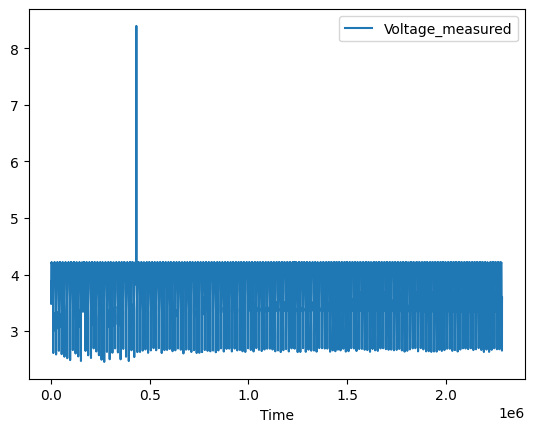

In [20]:
battery5.plot.line(x='Time', y='Voltage_measured')

In [21]:
z = stats.zscore(battery5['Voltage_measured'])


In [22]:
max(z)

20.10518194627037

In [23]:
list(z).index(max(z))

35180

In [24]:
battery5.iloc[35180]

Voltage_measured             8.393141
Current_measured            -0.000667
Temperature_measured        23.898678
Current_applied              0.000000
Voltage_applied              0.003000
Time                    431871.204000
Name: 35180, dtype: float64

In [25]:
battery5 = battery5.drop([35180])

<Axes: xlabel='Time'>

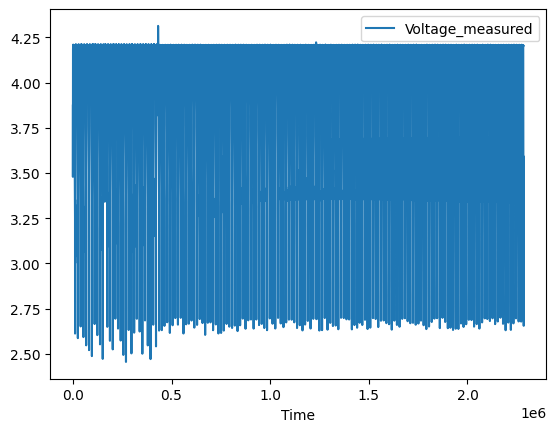

In [26]:
battery5.plot.line(x='Time', y='Voltage_measured')

In [27]:
battery5.to_csv('B0005_charge_discharge.csv')

#### Clean and Save Data for Battery B0006

In [8]:
battery6 = get_time_series_cycle('B0006')
battery6

/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//04505.csv
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//04506.csv
7597.875
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//04507.csv
11288.109
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//04508.csv
21804.109
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//04509.csv
25476.453
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//04510.csv
35961.0
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//04511.csv
39612.641
/Users/ahwang/.cache/kagglehub/datasets/patrickfleith/nasa-battery-dataset/versions/2/cleaned_dataset/data//04512.csv

,Voltage_measured,Current_measured,Temperature_measured,Current_applied,Voltage_applied,Time
0,3.864624,0.000082,24.682214,-0.0010,-0.007,0.000
1,3.469113,-4.059185,24.695407,-4.0600,1.558,2.532
2,3.994806,1.513750,24.711491,1.5060,4.710,5.500
3,4.005888,1.511389,24.739672,1.5060,4.726,8.344
4,4.012944,1.510817,24.753180,1.5060,4.737,11.125
...,...,...,...,...,...,...
591448,3.689577,-0.001671,32.367946,0.0006,0.000,2285372.086
591449,3.690020,-0.001914,32.464485,0.0006,0.000,2285381.836
591450,3.690708,-0.002706,32.337187,0.0006,0.000,2285391.602
591451,3.691356,-0.002952,32.252598,0.0006,0.000,2285401.414


<Axes: xlabel='Time'>

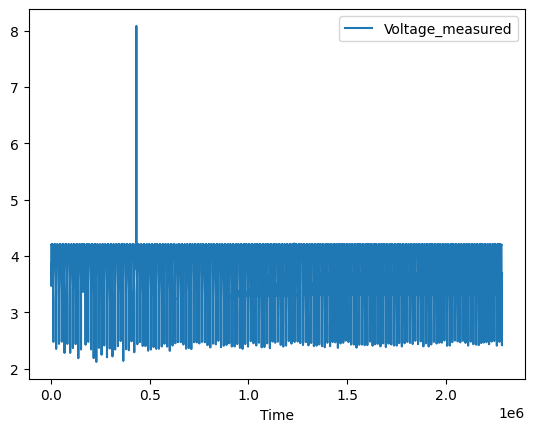

In [9]:
battery6.plot.line(x='Time', y='Voltage_measured')

In [10]:
z = stats.zscore(battery6['Voltage_measured'])


In [11]:
max(z)

17.708052792410985

In [12]:
list(z).index(max(z))

35180

In [14]:
battery6.iloc[35180]

Voltage_measured             8.083344
Current_measured             0.003656
Temperature_measured        23.834957
Current_applied              0.000000
Voltage_applied             -0.007000
Time                    431871.204000
Name: 35180, dtype: float64

In [15]:
battery6 = battery6.drop([35180])

<Axes: xlabel='Time'>

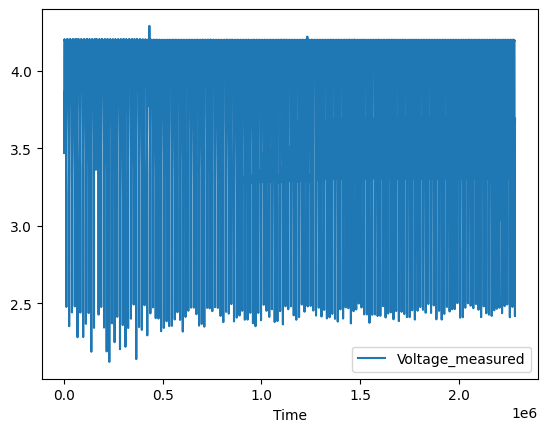

In [16]:
battery6.plot.line(x='Time', y='Voltage_measured')

In [18]:
battery6.to_csv('B0006_charge_discharge.csv')

##### Data is now ready to use in project.ipynb